In [1]:
import pandas as pd
import psycopg2
import numpy as np
from scipy.stats.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
import sys 
import os
sys.path.append(os.path.abspath("/home/scidb/HeartRatePatterns/Python"))
from LogisticRegresion import ajustLogisticRegression

In [3]:
def selectMatrix(withPearson,dbname="mimic") :
    conn = psycopg2.connect("dbname="+dbname)
    cur = conn.cursor()
    select_stament = ("SELECT m.subject_id,m.word,1 as Counting,s.isalive "
                      " FROM matrix m LEFT JOIN subjectwords s ON m.subject_id=s.subject_id"
    )
    if withPearson:
        select_stament = select_stament+" WHERE m.word in (select word from wordspearson order by p2 desc limit 400)"
    cur.execute(select_stament)
    select = []
    for row in cur :
        select.append((row))
    cur.close()
    conn.close()
    return select

In [4]:
def convertMatrix(withPearson=False) :
    labels = ['subject_id', 'Word', 'Counting','isAlive']
    df = pd.DataFrame.from_records(selectMatrix(withPearson), columns=labels)
    print(len(df))
    table = pd.pivot_table(df,index=["subject_id","isAlive"],columns=["Word"],values=["Counting"],
                       aggfunc={"Counting":[np.sum]},fill_value=0)
    table.columns = [value[2] for value in table.columns.values]
    return table

In [5]:
def savePearson(pearson,dbname="mimic") :
    conn = psycopg2.connect("dbname="+dbname)
    cur = conn.cursor()
    insert_statement=('INSERT INTO wordspearson(word,p1,p2)'
                      ' SELECT unnest( %(word)s ) ,'
                      ' unnest( %(p1)s) ,'
                      ' unnest( %(p2)s)')
    word=[r['word'] for r in pearson]
    p1=[r['p1'] for r in pearson]
    p2=[r['p2'] for r in pearson]
#    print(cur.mogrify(insert_statement,locals()))
    cur.execute(insert_statement,locals())
    conn.commit()
    cur.close()
    conn.close()

In [6]:
def selectPearson(dbname="mimic") :
    conn = psycopg2.connect("dbname="+dbname)
    cur = conn.cursor()
    select_statement='SELECT word,p1,p2 FROM wordspearson'
#    print(cur.mogrify(delete_statement,locals()))
    cur.execute(select_statement)
    select = []
    for row in cur :
        select.append({"word":row[0],"p1":row[1],"p2":row[2],})
    cur.close()
    conn.close()
    return select

In [7]:
def cleanPearson(dbname="mimic") :
    conn = psycopg2.connect("dbname="+dbname)
    cur = conn.cursor()
    delete_statement='DELETE FROM wordspearson'
#    print(cur.mogrify(delete_statement,locals()))
    cur.execute(delete_statement,locals())
    conn.commit()
    cur.close()
    conn.close()

In [8]:
table = convertMatrix()
print(table.shape)
table

134706
(658, 5610)


,,aaaae,aaaah,aaaai,aaaaj,aaabe,aaabf,aaabg,aaabh,aaabi,aaabj,...,lbbbb,lbbcb,lbcbb,leeee,libbb,liiii,liiil,liili,lilii,lliii
subject_id,isAlive,,,,,,,,,,,,,,,,,,,,,
85,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
151,1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
177,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
214,1,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
279,1,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
283,1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
368,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
377,1,1,1,0,1,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
408,1,0,0,0,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
survived = table.index.labels[1].tolist()
patients = table.values
columns = list(table.columns.values)

In [10]:
cleanPearson()
pearsonList = []
for i in range(len(columns)):
    pearson = pearsonr(patients[:,i],survived)
    pearsonList.append({'word':columns[i],'p1':pearson[0],'p2':pearson[1]})
savePearson(pearsonList)

In [11]:
table = convertMatrix(True)
table.shape

10108


(624, 400)

In [12]:
survived = table.index.labels[1].tolist()
patients = table.values

In [13]:
patients_train, patients_test,survived_train, survived_test = train_test_split(patients,survived,test_size=0.2, random_state=42)

In [14]:
print(table.shape)
print(patients_train.shape)
print(patients_test.shape)

(624, 400)
(499, 400)
(125, 400)


In [15]:
model = ajustLogisticRegression(patients_train,survived_train,patients_test,survived_test)

acurracy is 74.40%


In [16]:
print("Logistic Regression acurracy is %2.2f" % accuracy_score(survived_test,model.predict(patients_test)))

Logistic Regression acurracy is 0.74


In [17]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

In [18]:
def aucModel(name,survived_test,model,patients_test):
    logit_roc_auc = roc_auc_score(survived_test,model.predict(patients_test))
    print(name+" AUC = %2.2f"% logit_roc_auc)
    return logit_roc_auc

In [19]:
print("Logistic Regression acurracy is %2.2f" % accuracy_score(survived_test,model.predict(patients_test)))
logit_roc_auc = aucModel("Logistic",survived_test,model,patients_test)

Logistic Regression acurracy is 0.74
Logistic AUC = 0.50


In [20]:
model

LogisticRegressionCV(Cs=[4.51e-05, 4.672e-05, 4.8339999999999995e-05, 4.9959999999999996e-05, 5.157999999999999e-05, 5.319999999999999e-05],
           class_weight=None, cv=5, dual=True, fit_intercept=True,
           intercept_scaling=1.0, max_iter=100, multi_class='ovr',
           n_jobs=-1, penalty='l2', random_state=0, refit=True,
           scoring='roc_auc', solver='liblinear', tol=0.0001, verbose=0)

In [21]:
from operator import itemgetter
pearsonDict = selectPearson()
pearsonDict = sorted(pearsonDict, key=itemgetter('p1'), reverse=True)

In [25]:
def findword(word,dbname="mimic") :
    conn = psycopg2.connect("dbname="+dbname)
    cur = conn.cursor()
    select_statement='''SELECT v1.r_s,v5.q_s,v1.record,a.rec_from
    FROM rstq v1 
    LEFT JOIN a on a.record=v1.record
    LEFT JOIN rstq v2 on v1.record=v2.record
    LEFT JOIN rstq v3 on v1.record=v3.record
    LEFT JOIN rstq v4 on v1.record=v4.record
    LEFT JOIN rstq v5 on v1.record=v5.record
    WHERE a.rec_from IS NOT NULL and v1.centroid =%s  
    AND v2.centroid =%s AND v1.id+1=v2.id
    AND v3.centroid=%s AND v2.id+1=v3.id 
    AND v4.centroid=%s AND v3.id+1=v4.id 
    AND v5.centroid=%s AND v4.id+1=v5.id 
    LIMIT 1
'''
#    print(cur.mogrify(delete_statement,locals()))
    cur.execute(select_statement,(word[0],word[1],word[2],word[3],word[4],))
    select = []
    for row in cur :
        fromVal=row[3]+row[0]
        toVal=row[3]+row[1]
        select = {'from':fromVal,'to':toVal,'record':row[2],'word':word}
    cur.close()
    conn.close()
    return select

In [23]:
import wfdb
import matplotlib.pyplot as plt
def printCentroid(wave) :
    onda=wave['record'].split("/")[3]
    pbdir =wave['record'].replace("/"+onda,'')
    if 'mimic3wdb' in wave['record']:
        pbdir = onda.split("-")[0].replace("s",'').zfill(6)
        onda = onda.replace(onda.split("-")[0].replace("s",''),onda.split("-")[0].replace("s",'').zfill(6))
        pbdir = wave['record'].split("/")[0]+'/'+wave['record'].split("/")[1]+'/p'+pbdir[:2]+'/p'+pbdir+'/'
        onda = onda.replace('s','p')
    sig, fields = wfdb.srdsamp(onda,pbdir=pbdir, sampto=1)
    signalII = fields['signame'].index("II")
    sfrom = wave['from']-20
    sto   = wave['to']
    originalWave = wfdb.rdsamp(onda,pbdir=pbdir,channels =[signalII], sampfrom=sfrom, sampto=sto).p_signals
    originalWave = originalWave[~np.isnan(originalWave)]
    print(wave['word'],wave['from'],wave['to'],wave['record'])
    ax.set_title(wave['word'])
    ax.plot(originalWave)

fabdb 27539966 27542771 mimic2wdb/matched/s21050/s21050-3273-03-19-20-25
ddddf 744506 745894 mimic2wdb/matched/s17948/s17948-2898-09-15-07-44
aafdf 6581016 6585812 mimic2wdb/matched/s10710/s10710-3034-09-01-16-34
ffada 19058589 19061325 mimic2wdb/matched/s15924/s15924-2896-11-13-16-35
faaga 29452885 29455449 mimic2wdb/matched/s05205/s05205-3394-04-09-21-43
fbabd 162930 164196 mimic2wdb/matched/s14836/s14836-3180-01-31-12-54


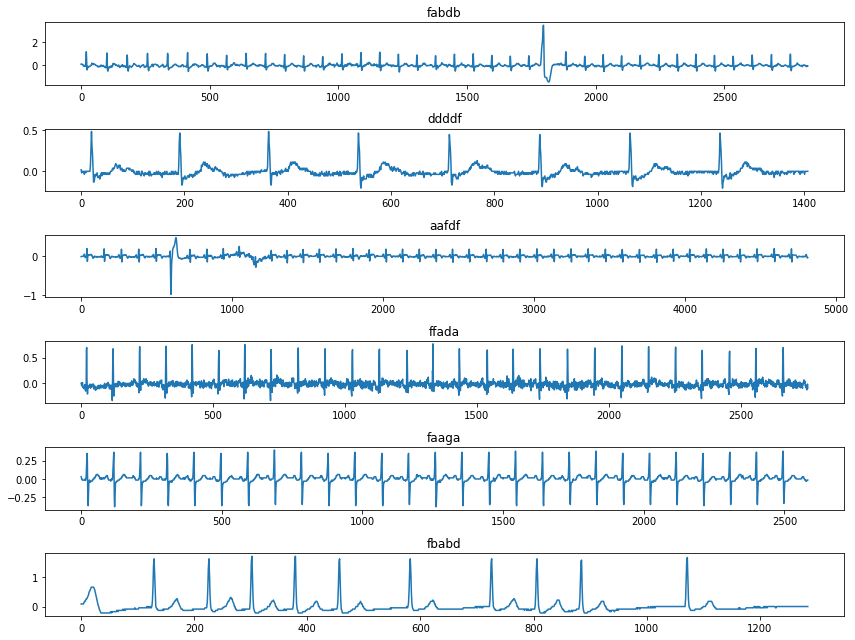

In [27]:
fig_size = [12,9]
plt.rcParams["figure.figsize"] = fig_size
fig = plt.figure()
regs = 6
for i in range(regs):
    ax = fig.add_subplot(regs,1,i+1)
    word = findword(pearsonDict[i]['word'])
    printCentroid(word)
plt.tight_layout()
plt.show()